In [1]:
import pandas as pd

X = pd.read_csv("preprocessed_apartment_rentals.csv")

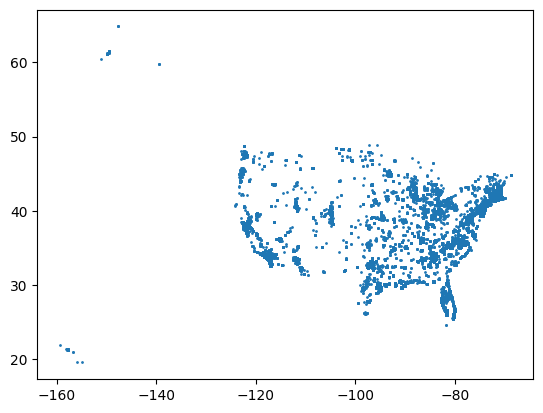

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X["longitude"], X["latitude"], s=1)

[1088  878  688 ...  991 1521  991]


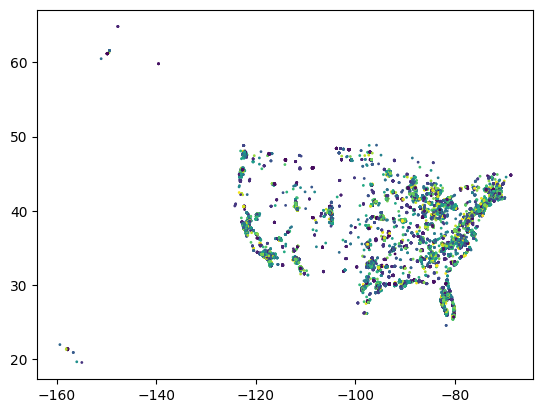

In [3]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2000)
kmeans.fit(X[["longitude", "latitude"]])
clusters = kmeans.labels_
print(kmeans.labels_)
plt.scatter(X["longitude"], X["latitude"], c=clusters, s=1)

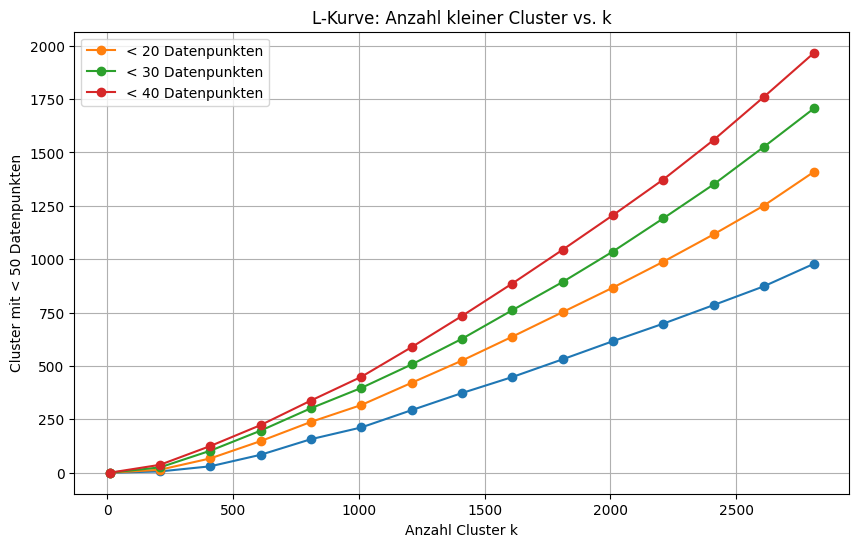

In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Annahme: X ist ein DataFrame mit Spalten "longitude" und "latitude"
coords = X[["longitude", "latitude"]].values

# Bereich der k-Werte definieren
k_values = range(10, 3001, 200)  # Beispiel: 10 bis 3000 in Schritten von 50
small_cluster_counts = []
small20_clusters = []
small30_clusters = []
small40_clusters = []

for k in k_values:
    km = KMeans(n_clusters=k, n_init="auto", random_state=0)
    labels = km.fit_predict(coords)

    # Clustergrößen zählen
    _, counts = np.unique(labels, return_counts=True)

    # Anzahl der Cluster mit weniger als 50 Punkten
    small_clusters = np.sum(counts < 10)
    small_cluster_counts.append(small_clusters)
    small_clusters = np.sum(counts < 20)
    small20_clusters.append(small_clusters)
    small_clusters = np.sum(counts < 30)
    small30_clusters.append(small_clusters)
    small_clusters = np.sum(counts < 40)
    small40_clusters.append(small_clusters)

# Plot der L-Kurve
plt.figure(figsize=(10,6))
plt.plot(k_values, small_cluster_counts, marker="o")
plt.plot(k_values, small20_clusters, marker="o", label="< 20 Datenpunkten")
plt.plot(k_values, small30_clusters, marker="o", label="< 30 Datenpunkten")
plt.plot(k_values, small40_clusters, marker="o", label="< 40 Datenpunkten")
plt.legend()
plt.xlabel("Anzahl Cluster k")
plt.ylabel("Cluster mit < 50 Datenpunkten")
plt.title("L-Kurve: Anzahl kleiner Cluster vs. k")
plt.grid(True)
plt.show()


In [ ]:
one_hot_clusters = pd.get_dummies(clusters, prefix="cluster").astype(int)
X = pd.concat([X, one_hot_clusters], axis=1)


In [ ]:
#X.to_csv("preprocessed_apartment_rentals_clusters.csv", index=False)